In [9]:
import numpy as np
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
    def train(self, patterns):
        for p in patterns:
            p = np.array(p)
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0) # no self-connection
        self.weights /= len(patterns)
    def recall(self, pattern, steps=5):

        state = np.array(pattern)
        for _ in range(steps):
            for i in range(self.size):
                raw = np.dot(self.weights[i], state)
                state[i] = 1 if raw >= 0 else -1
        return state

In [11]:

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # Define training patterns (bipolar: +1 / -1)
    patterns = [
    [1, -1, 1, -1], # Pattern 1
    [1, 1, -1, -1] # Pattern 2
    ]
    hopfield = HopfieldNetwork(size=4)
    hopfield.train(patterns)
    # Test with a noisy version of pattern 1
    test_pattern = [1, -1, -1, -1]
    print("Input Pattern: ", test_pattern)
    output = hopfield.recall(test_pattern)
    print("Recalled Pattern: ", output.tolist())

Input Pattern:  [1, -1, -1, -1]
Recalled Pattern:  [1, 1, -1, -1]


############################################################################################################################################################


practical 5b


3
(-5, 7)


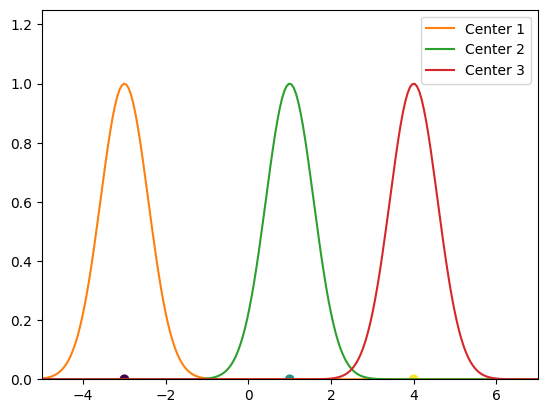

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Data
D = np.array([[-3], [1], [4]]) # 3 datapoints
N = len(D)
# Gaussian RBF
def rbf_gauss(gamma=1.0):
    def func(x):
        return np.exp(-gamma * np.linalg.norm(x)**2)
    return func
# X limits
xlim = (-5, 7)
print(N)
print(xlim)
# Plot
plt.figure()
plt.xlim(xlim)
plt.ylim(0, 1.25)
plt.plot([], []) # empty plot
plt.scatter(D, [0]*len(D), c=range(1, N+1), marker='o')
x_coord = np.linspace(-7, 7, 250)
gamma = 1.5
for i in range(N):
    y_vals = [rbf_gauss(gamma)(x - D[i]) for x in x_coord]
    plt.plot(x_coord, y_vals, label=f"Center {i+1}")
plt.legend()
plt.show()